# Persiapkan Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dataframe = pd.read_excel('doctor-fee.xlsx')
dataframe = dataframe.drop('Miscellaneous_Info',axis=1)

In [3]:
dataframe.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Rating         2659 non-null   object
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 279.5+ KB


# Mengisi Data Kosong Dengan Nilai Rata-Rata

In [5]:
def fill_rating(rate_column):
    def loop_over(mean=None):
        for data in rate_column:
            try:
                if mean:
                    final_data.append(int(data[:-1]))
                else:
                    valid_data.append(int(data[:-1]))
            except TypeError:
                if mean:
                    final_data.append(mean_rating)
                else:
                    pass
    valid_data = []
    loop_over()
    mean_rating = np.mean(valid_data)
    final_data = []
    loop_over(True)
    return final_data

In [6]:
dataframe['Rating'] = fill_rating(dataframe['Rating'])

In [7]:
dataframe.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100.000000,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.000000,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,94.643475,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,94.643475,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100.000000,"Keelkattalai, Chennai",Ayurveda,250


# Format Data Numerik

In [8]:
def convert_experience():
    experience = []
    for exp in dataframe['Experience']:
        exp = int(exp[:-17])
        experience.append(exp)
    return experience

In [9]:
dataframe['Experience'] = convert_experience()

In [10]:
dataframe.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100.000000,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98.000000,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,94.643475,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,94.643475,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100.000000,"Keelkattalai, Chennai",Ayurveda,250


# Menghapus Data Kosong

In [11]:
dataframe.dropna(subset = ['Place'], inplace=True)

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5936 non-null   object 
 1   Experience     5936 non-null   int64  
 2   Rating         5936 non-null   float64
 3   Place          5936 non-null   object 
 4   Profile        5936 non-null   object 
 5   Fees           5936 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 324.6+ KB


In [13]:
dataframe.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100.000000,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98.000000,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,94.643475,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,94.643475,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100.000000,"Keelkattalai, Chennai",Ayurveda,250


# Encoding Data

In [14]:
def encode_dataframe(columns):
    encoder = LabelEncoder()
    for col in columns:
        dataframe[col] = encoder.fit_transform(dataframe[col])

In [15]:
encode_dataframe(['Qualification','Place','Profile'])

In [16]:
dataframe.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,24,100.000000,299,5,100
1,73,12,98.000000,866,0,350
2,1134,9,94.643475,457,3,300
3,464,12,94.643475,68,0,250
4,10,20,100.000000,337,0,250


In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5936 non-null   int32  
 1   Experience     5936 non-null   int64  
 2   Rating         5936 non-null   float64
 3   Place          5936 non-null   int32  
 4   Profile        5936 non-null   int32  
 5   Fees           5936 non-null   int64  
dtypes: float64(1), int32(3), int64(2)
memory usage: 255.1 KB


# Memisahkan Data

In [18]:
data = dataframe.drop('Fees',axis=1)
fees = dataframe['Fees']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(data,fees,test_size=0.2)

# Machine Learning Model

In [20]:
model = RandomForestRegressor(n_estimators=100)

In [21]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [22]:
prediction = model.predict(x_test)

# Evaluation Metrics
Evauation Metrics for Regresion are :
* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Percentage Error (MAPE)
* R-Squared Score

In [23]:
mean_absolute_error(y_test,prediction)

134.28970298220298

# Visualisasi Prediksi

In [24]:
def visualize(y_true,y_pred,title=None):
    plt.figure(figsize=(20,5))
    plt.title(title)
    plt.scatter(range(len(y_true)),y_true,label='True Value',alpha=0.5)
    plt.scatter(range(len(y_pred)),y_pred,label='Prediction',alpha=0.5)
    plt.legend()
    plt.show()

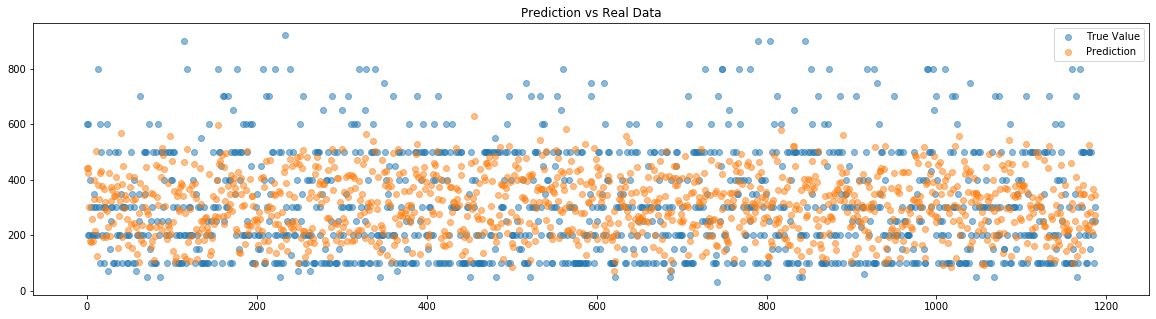

In [25]:
visualize(y_test,prediction,'Prediction vs Real Data')

# Korelasi Matrix

In [26]:
dataframe.corr()

,Qualification,Experience,Rating,Place,Profile,Fees
Qualification,1.000000,0.135008,-0.162300,0.006567,0.393179,0.263719
Experience,0.135008,1.000000,-0.178312,0.011557,0.201435,-0.004699
Rating,-0.162300,-0.178312,1.000000,0.015764,-0.111034,-0.090328
Place,0.006567,0.011557,0.015764,1.000000,0.018743,-0.055979
Profile,0.393179,0.201435,-0.111034,0.018743,1.000000,0.144392
Fees,0.263719,-0.004699,-0.090328,-0.055979,0.144392,1.000000


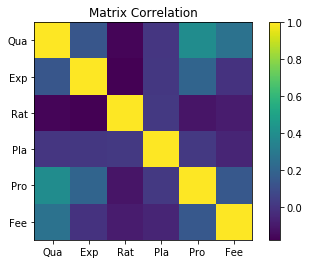

In [27]:
plt.imshow(dataframe.corr())
plt.title('Matrix Correlation')
plt.xticks(range(6),labels=[i[:3] for i in ['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Fees']])
plt.yticks(range(6),labels=[i[:3] for i in ['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Fees']])
plt.colorbar();

# Meningkatkan Model

In [28]:
model.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
model_parameter = {'bootstrap': [True, False],
                   'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                   'max_features': ['auto', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [30]:
model = RandomForestRegressor()

In [31]:
model_random_param = RandomizedSearchCV(estimator = model,
                                        param_distributions = model_parameter,
                                        n_iter = 20,
                                        cv = 5,
                                        verbose=2,
                                        random_state=42,
                                        n_jobs = -1
                                       )

In [32]:
model_random_param.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [33]:
model_random_param.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

# Final Model

In [34]:
model = RandomForestRegressor(n_estimators=200,
                              min_impurity_decrease=5,
                              min_samples_leaf=2,
                              max_features='sqrt',
                              bootstrap=True)

In [35]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=5, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
prediction = model.predict(x_test)

In [37]:
mean_absolute_error(y_test,prediction)

134.4010708834409

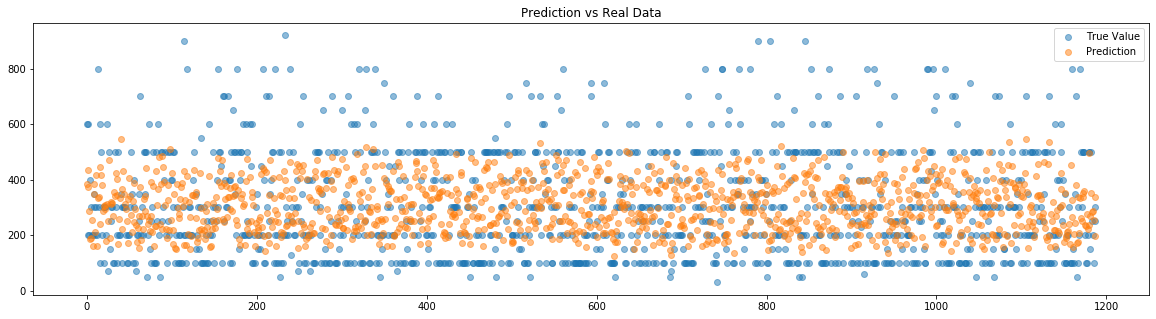

In [38]:
visualize(y_test,prediction,'Prediction vs Real Data')

In [39]:
comparsion_dataframe = x_test.copy()

In [40]:
comparsion_dataframe = comparsion_dataframe.join(y_test)
comparsion_dataframe['Prediction'] = prediction
comparsion_dataframe['Difference'] = abs(y_test - prediction)

In [41]:
comparsion_dataframe

,Qualification,Experience,Rating,Place,Profile,Fees,Prediction,Difference
4552,1377,8,94.643475,783,3,600,385.804126,214.195874
4163,874,9,94.643475,591,2,200,436.299713,236.299713
4384,1060,19,88.000000,866,3,600,374.143188,225.856812
1570,354,10,94.643475,102,5,200,286.649176,86.649176
909,10,14,94.643475,317,0,400,187.416860,212.583140
...,...,...,...,...,...,...,...,...
4283,351,20,94.643475,451,5,250,284.604813,34.604813
3606,351,4,94.643475,391,5,200,286.732219,86.732219
4607,219,14,94.643475,739,1,100,254.039507,154.039507
2983,134,12,94.643475,249,1,250,196.136869,53.863131


In [42]:
best_prediction = comparsion_dataframe[comparsion_dataframe['Difference'] < 50]
worst_prediction = comparsion_dataframe[comparsion_dataframe['Difference'] > 200]

In [43]:
len(best_prediction),len(worst_prediction)

(284, 269)

# Simpan Model

In [44]:
with open('doctor-fee-regression.pkl','wb') as file:
    pickle.dump(model,file)